In [1]:
pip install pandas

In [2]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = '/content/Why are suicide rates so high for men worldwide.xlsx'

# Read Excel file into a DataFrame
df = pd.read_excel(file_path)

# Now, 'df' contains your Excel data
print(df)


     Row Labels  Average of Male suicide rate (age-standardized)  \
0          1990                                        18.705217   
1          1991                                        18.847283   
2          1992                                        19.145870   
3          1993                                        19.692065   
4          1994                                        20.053587   
5          1995                                        20.115652   
6          1996                                        19.842283   
7          1997                                        19.724457   
8          1998                                        19.682174   
9          1999                                        19.549891   
10         2000                                        19.485652   
11         2001                                        19.348804   
12         2002                                        19.196522   
13         2003                                 

In [3]:
# Create an empty dictionary to store data frames from each sheet
data_frames = {}

# Read each sheet into a separate data frame
xls = pd.ExcelFile(file_path)
for sheet_name in xls.sheet_names:
    data_frames[sheet_name] = xls.parse(sheet_name)

# Now, 'data_frames' is a dictionary where each key is a sheet name, and the corresponding value is a DataFrame containing the data from that sheet.

# You can access and analyze the data frames for each sheet as needed.
for sheet_name, df in data_frames.items():
    print(f"Data from sheet '{sheet_name}':")
    print(df)

Data from sheet 'male-vs-female-suicide.csv':
     Row Labels  Average of Male suicide rate (age-standardized)  \
0          1990                                        18.705217   
1          1991                                        18.847283   
2          1992                                        19.145870   
3          1993                                        19.692065   
4          1994                                        20.053587   
5          1995                                        20.115652   
6          1996                                        19.842283   
7          1997                                        19.724457   
8          1998                                        19.682174   
9          1999                                        19.549891   
10         2000                                        19.485652   
11         2001                                        19.348804   
12         2002                                        19.196522   
13

In [4]:
for sheet_name, df in data_frames.items():
    print(f"Data from sheet '{sheet_name}':")
    print(df.head())  # Display the first few rows to get a sense of the data
    print(df.info())  # Summary of data types and non-null counts
    print(df.describe())  # Basic statistics

Data from sheet 'male-vs-female-suicide.csv':
  Row Labels  Average of Male suicide rate (age-standardized)  \
0       1990                                        18.705217   
1       1991                                        18.847283   
2       1992                                        19.145870   
3       1993                                        19.692065   
4       1994                                        20.053587   

   Average of Female suicide rate (age-standardized)  
0                                           6.978913  
1                                           6.932283  
2                                           6.966196  
3                                           6.973043  
4                                           6.957826  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                        

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for sheet_name, df in data_frames.items():
    # Replace 'Your_Column_Name' with the actual column name from your data
    column_name = 'Your_Column_Name'

    # Check if the column exists in the DataFrame
    if column_name in df.columns:
        sns.histplot(data=df, x=column_name, kde=True)
        plt.title(f'Histogram for {sheet_name}')
        plt.show()
    else:
        print(f"Column '{column_name}' not found in sheet '{sheet_name}'.")

Column 'Your_Column_Name' not found in sheet 'male-vs-female-suicide.csv'.
Column 'Your_Column_Name' not found in sheet 'male-vs-female-suicide-with-dep'.
Column 'Your_Column_Name' not found in sheet 'marriage-rate-per-1000-inhabita'.
Column 'Your_Column_Name' not found in sheet 'prevalence_by_mental_and_substa'.


In [6]:
for sheet_name, df in data_frames.items():
    print(f"Columns in sheet '{sheet_name}':")
    print(df.columns)


Columns in sheet 'male-vs-female-suicide.csv':
Index(['Row Labels', 'Average of Male suicide rate (age-standardized)',
       'Average of Female suicide rate (age-standardized)'],
      dtype='object')
Columns in sheet 'male-vs-female-suicide-with-dep':
Index(['Row Labels', 'Average of depression prevalance in males ',
       'Average of Male suicide rate (age-standardized)'],
      dtype='object')
Columns in sheet 'marriage-rate-per-1000-inhabita':
Index(['Entity', 'Code', 'Year',
       'Crude marriage rate (per 1,000 inhabitants)'],
      dtype='object')
Columns in sheet 'prevalence_by_mental_and_substa':
Index(['entity', 'code', 'year', 'schizophrenia', 'bipolar_disorder',
       'eating_disorders', 'anxiety_disorders', 'drug_use_disorders',
       'depression', 'alcohol_use_disorders'],
      dtype='object')


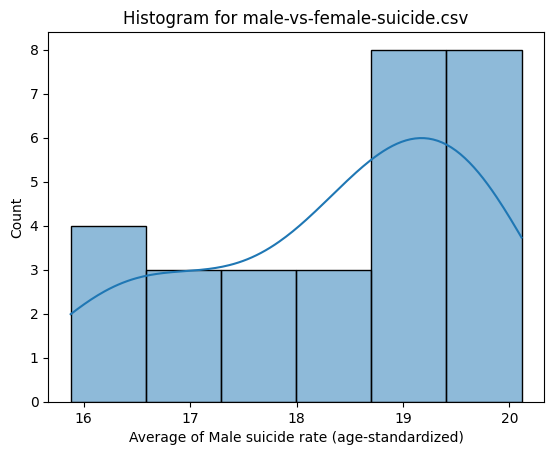

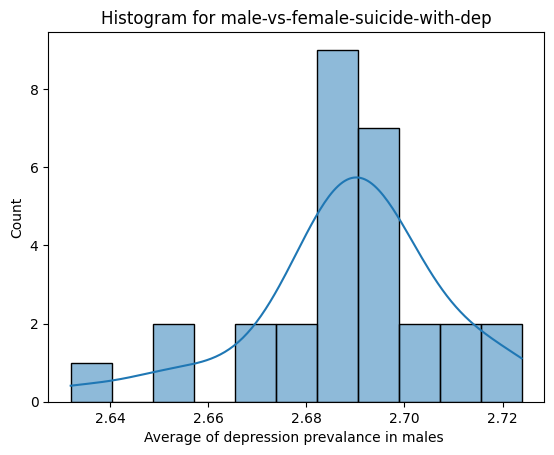

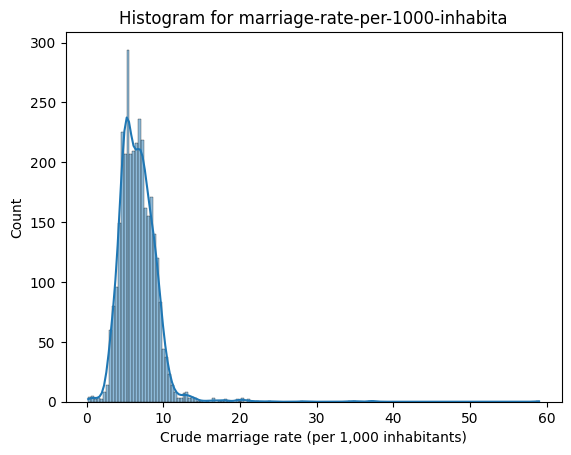

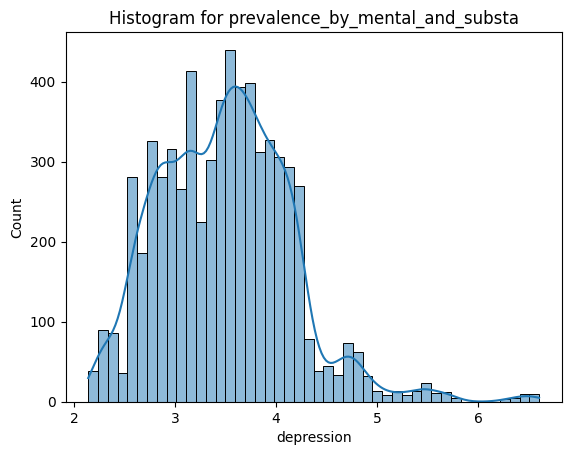

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for sheet_name, df in data_frames.items():
    # Specify the actual column names from your data
    if sheet_name == 'male-vs-female-suicide.csv':
        column_name = 'Average of Male suicide rate (age-standardized)'
    elif sheet_name == 'male-vs-female-suicide-with-dep':
        column_name = 'Average of depression prevalance in males '
    elif sheet_name == 'marriage-rate-per-1000-inhabita':
        column_name = 'Crude marriage rate (per 1,000 inhabitants)'
    elif sheet_name == 'prevalence_by_mental_and_substa':
        column_name = 'depression'

    # Create histograms for the specified columns
    if column_name in df.columns:
        sns.histplot(data=df, x=column_name, kde=True)
        plt.title(f'Histogram for {sheet_name}')
        plt.show()
    else:
        print(f"Column '{column_name}' not found in sheet '{sheet_name}'.")


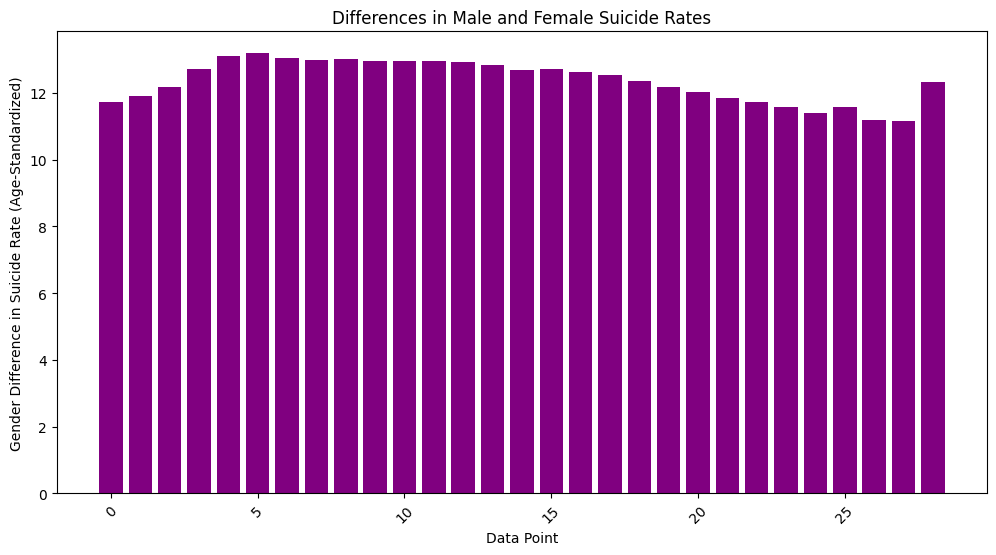

Correlation between male and female suicide rates: 0.94


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from an Excel workbook
xls = pd.ExcelFile('/content/Why are suicide rates so high for men worldwide.xlsx')  # Replace 'your_data.xlsx' with the actual file path

# Load the specific sheet with the CSV data
data = pd.read_excel(xls, sheet_name='male-vs-female-suicide.csv')

# Calculate the average difference in suicide rates between genders
data['Gender_Difference'] = data['Average of Male suicide rate (age-standardized)'] - data['Average of Female suicide rate (age-standardized)']

# Plot the differences in male and female suicide rates
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Gender_Difference'], color='purple')
plt.title('Differences in Male and Female Suicide Rates')
plt.xlabel('Data Point')
plt.ylabel('Gender Difference in Suicide Rate (Age-Standardized)')
plt.xticks(rotation=45)
plt.show()

# Investigate the correlation between male and female suicide rates
correlation = data['Average of Male suicide rate (age-standardized)'].corr(data['Average of Female suicide rate (age-standardized)'])
print(f'Correlation between male and female suicide rates: {correlation:.2f}')


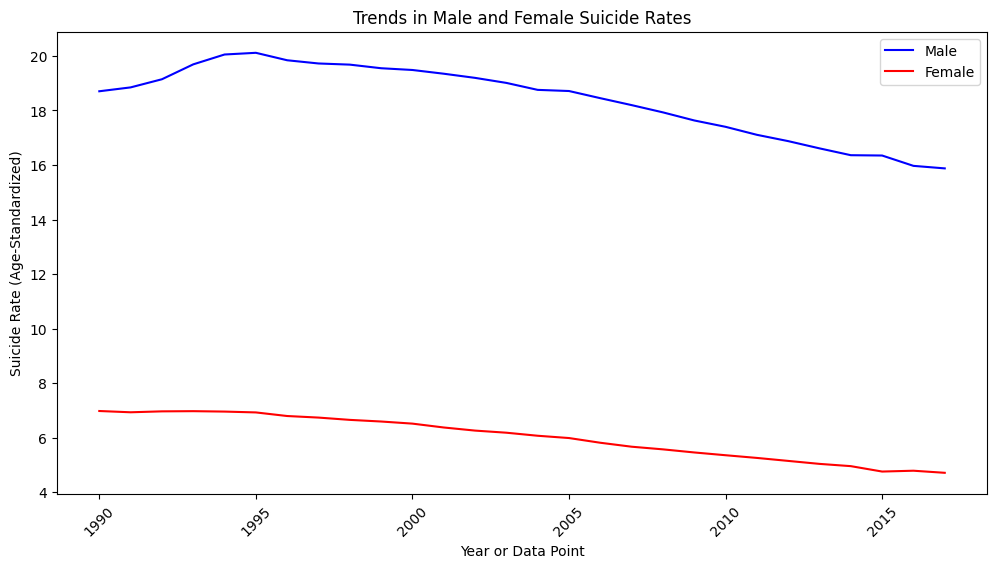

Year with the highest male suicide rate: 1995
Year with the lowest male suicide rate: 2017
Year with the highest female suicide rate: 1990
Year with the lowest female suicide rate: 2017
Correlation between male and female suicide rates: 0.94


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from an Excel workbook
xls = pd.ExcelFile('/content/Why are suicide rates so high for men worldwide.xlsx')  # Replace 'your_data.xlsx' with the actual file path

# Load the specific sheet with the CSV data
data = pd.read_excel(xls, sheet_name='male-vs-female-suicide.csv')

# Filter out non-numeric rows based on 'Row Labels' column
data = data[pd.to_numeric(data['Row Labels'], errors='coerce').notna()]

# Calculate the average difference in suicide rates between genders
data['Gender_Difference'] = data['Average of Male suicide rate (age-standardized)'] - data['Average of Female suicide rate (age-standardized)']

# Calculate the year with the highest and lowest male suicide rate
year_with_highest_male_suicide_rate = data.loc[data['Average of Male suicide rate (age-standardized)'].idxmax(), 'Row Labels']
year_with_lowest_male_suicide_rate = data.loc[data['Average of Male suicide rate (age-standardized)'].idxmin(), 'Row Labels']

# Calculate the year with the highest and lowest female suicide rate
year_with_highest_female_suicide_rate = data.loc[data['Average of Female suicide rate (age-standardized)'].idxmax(), 'Row Labels']
year_with_lowest_female_suicide_rate = data.loc[data['Average of Female suicide rate (age-standardized)'].idxmin(), 'Row Labels']

# Investigate the correlation between male and female suicide rates
correlation = data['Average of Male suicide rate (age-standardized)'].corr(data['Average of Female suicide rate (age-standardized)'])

# Plot the trends in male and female suicide rates (if applicable)
plt.figure(figsize=(12, 6))
plt.plot(data['Row Labels'], data['Average of Male suicide rate (age-standardized)'], label='Male', color='blue')
plt.plot(data['Row Labels'], data['Average of Female suicide rate (age-standardized)'], label='Female', color='red')
plt.title('Trends in Male and Female Suicide Rates')
plt.xlabel('Year or Data Point')
plt.ylabel('Suicide Rate (Age-Standardized)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Print the results
print(f'Year with the highest male suicide rate: {year_with_highest_male_suicide_rate}')
print(f'Year with the lowest male suicide rate: {year_with_lowest_male_suicide_rate}')
print(f'Year with the highest female suicide rate: {year_with_highest_female_suicide_rate}')
print(f'Year with the lowest female suicide rate: {year_with_lowest_female_suicide_rate}')
print(f'Correlation between male and female suicide rates: {correlation:.2f}')


In [18]:
import pandas as pd

# Load the data from an Excel workbook
xls = pd.ExcelFile('/content/Why are suicide rates so high for men worldwide.xlsx')

# Load the specific sheet with the relevant data
data = pd.read_excel(xls, sheet_name='male-vs-female-suicide-with-dep')

# Print the available column names
print(data.columns)


Index(['Row Labels', 'Average of depression prevalance in males ',
       'Average of Male suicide rate (age-standardized)'],
      dtype='object')


Correlation between depression prevalence in males and male suicide rates: 0.23


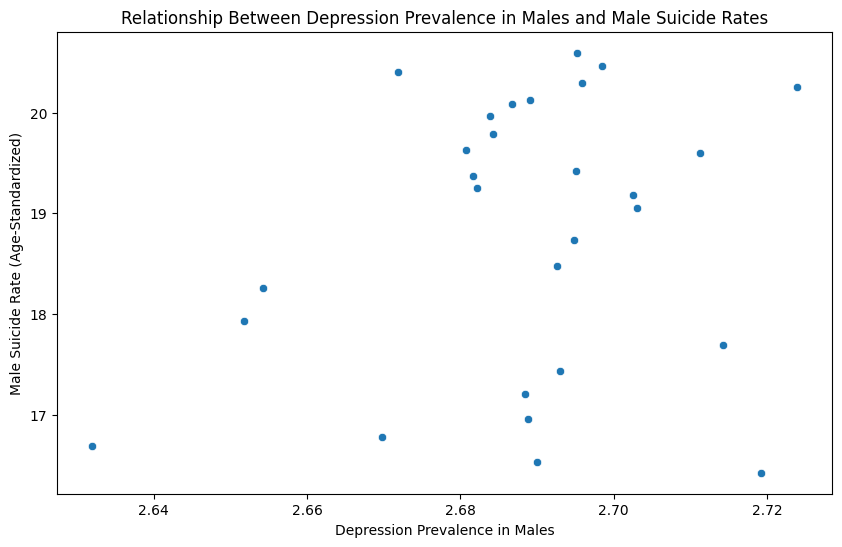

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from an Excel workbook
xls = pd.ExcelFile('/content/Why are suicide rates so high for men worldwide.xlsx')

# Load the specific sheet with the relevant data
data = pd.read_excel(xls, sheet_name='male-vs-female-suicide-with-dep')

# Filter out rows with 'Grand Total' in the 'Row Labels' column
data = data[data['Row Labels'] != 'Grand Total']

# Calculate the correlation between depression prevalence and male suicide rates
correlation = data['Average of depression prevalance in males '].corr(data['Average of Male suicide rate (age-standardized)'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Average of depression prevalance in males ', y='Average of Male suicide rate (age-standardized)')
plt.title('Relationship Between Depression Prevalence in Males and Male Suicide Rates')
plt.xlabel('Depression Prevalence in Males')
plt.ylabel('Male Suicide Rate (Age-Standardized)')

# Identify trends or patterns over time (if applicable)
# You may consider using a time-related column if available in your dataset

# Print the results
print(f'Correlation between depression prevalence in males and male suicide rates: {correlation:.2f}')

plt.show()


Correlation between depression prevalence in males and male suicide rates: 0.23


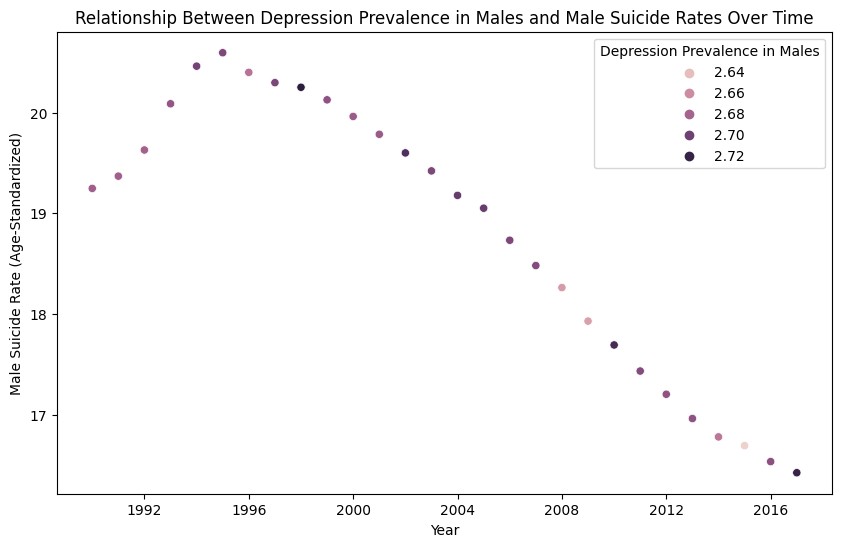

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from an Excel workbook
xls = pd.ExcelFile('/content/Why are suicide rates so high for men worldwide.xlsx')

# Load the specific sheet with the relevant data
data = pd.read_excel(xls, sheet_name='male-vs-female-suicide-with-dep')

# Filter out rows with 'Grand Total' in the 'Row Labels' column
data = data[data['Row Labels'] != 'Grand Total']

# Convert the 'Row Labels' column to a datetime format if it contains time information
data['Row Labels'] = pd.to_datetime(data['Row Labels'], format='%Y')  # Adjust the format as needed

# Calculate the correlation between depression prevalence and male suicide rates
correlation = data['Average of depression prevalance in males '].corr(data['Average of Male suicide rate (age-standardized)'])

# Create a scatter plot to visualize the relationship over time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Row Labels', y='Average of Male suicide rate (age-standardized)', hue='Average of depression prevalance in males ')
plt.title('Relationship Between Depression Prevalence in Males and Male Suicide Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Male Suicide Rate (Age-Standardized)')
plt.legend(title='Depression Prevalence in Males')

# Print the results
print(f'Correlation between depression prevalence in males and male suicide rates: {correlation:.2f}')

plt.show()


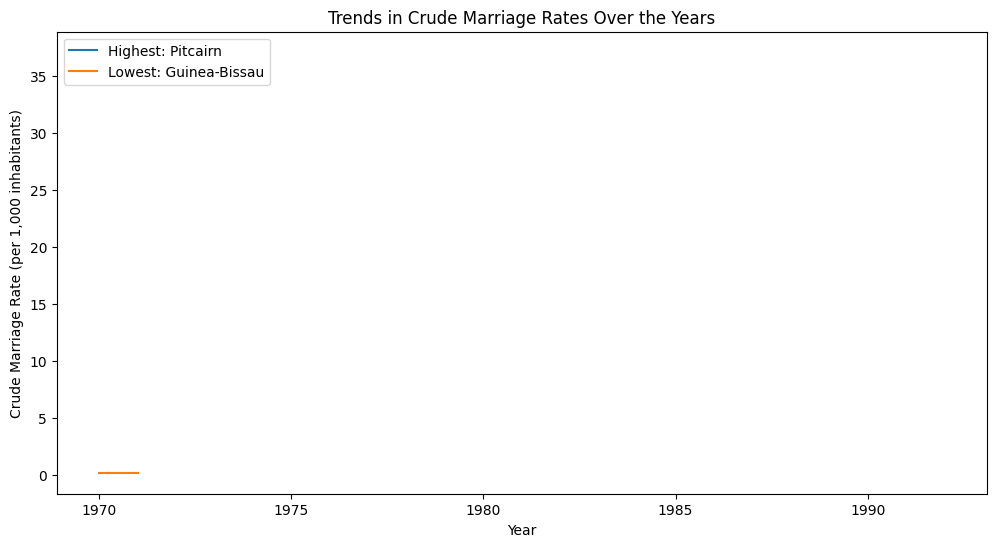

Entity with the highest marriage rate: Pitcairn
Entity with the lowest marriage rate: Guinea-Bissau


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from an Excel workbook
xls = pd.ExcelFile('/content/Why are suicide rates so high for men worldwide.xlsx')

# Load the specific sheet with the marriage rate data
data = pd.read_excel(xls, sheet_name='marriage-rate-per-1000-inhabita')

# Filter out non-numeric rows or irrelevant data
# Depending on your data structure, you might need to clean the data.

# Assuming the column 'Year' represents the years and 'Entity' represents different entities
marriage_rates = data.pivot(index='Year', columns='Entity', values='Crude marriage rate (per 1,000 inhabitants)')

# Calculate trends in crude marriage rates over the years for different entities
# Note that you need to adapt this code based on your dataset.

# Identify entities with the highest and lowest marriage rates
highest_marriage_rate_entity = marriage_rates.mean().idxmax()
lowest_marriage_rate_entity = marriage_rates.mean().idxmin()

# Plot trends in marriage rates for specific entities
plt.figure(figsize=(12, 6))
plt.plot(marriage_rates.index, marriage_rates[highest_marriage_rate_entity], label=f'Highest: {highest_marriage_rate_entity}')
plt.plot(marriage_rates.index, marriage_rates[lowest_marriage_rate_entity], label=f'Lowest: {lowest_marriage_rate_entity}')
plt.title('Trends in Crude Marriage Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Crude Marriage Rate (per 1,000 inhabitants)')
plt.legend()

# Investigate relationships between marriage rates and other variables
# You might need to merge this data with other relevant data or perform additional analysis.

# Show the plot
plt.show()

# Print the results
print(f'Entity with the highest marriage rate: {highest_marriage_rate_entity}')
print(f'Entity with the lowest marriage rate: {lowest_marriage_rate_entity}')



<ipython-input-24-36686b3e95f3>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


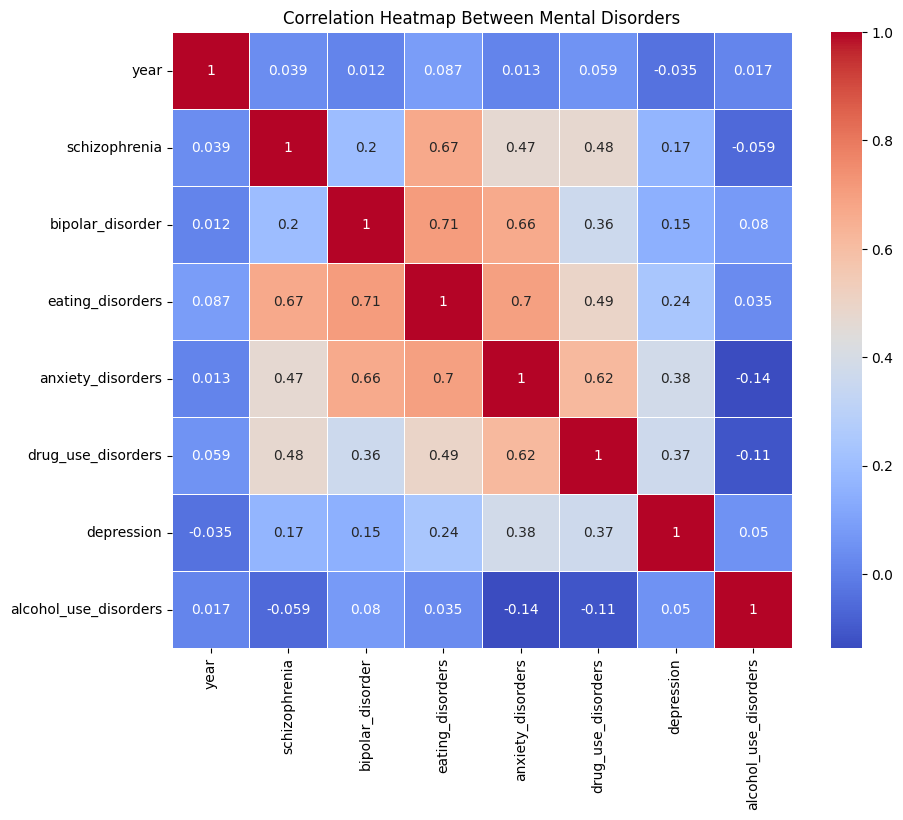

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from an Excel workbook
xls = pd.ExcelFile('/content/Why are suicide rates so high for men worldwide.xlsx')

# Load the specific sheet with the prevalence data
data = pd.read_excel(xls, sheet_name='prevalence_by_mental_and_substa')

# Clean and preprocess the data as needed
# Remove non-numeric rows, if present

# Calculate trends in the prevalence of mental and substance disorders over time and across entities
# Depending on your data structure, pivot or reshape the data

# Calculate correlations between different mental disorders
correlation_matrix = data.corr()

# Visualize correlations, e.g., using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Mental Disorders')
plt.show()

# Explore relationships between the prevalence of mental disorders and other factors
# You might need to merge this data with other relevant data or perform additional analysis

# Print and interpret the results

